## Gerando dados

In [3]:
from random import randint, seed

# Usa os mesmos dados aleatórios em todas as execuções
seed(10)

temperature = [ randint(8, 20)  for x in range(30) ]
rainfall    = [ randint(0, 15)  for x in range(30) ]
wind_speed  = [ randint(30, 75) for x in range(30) ]

# Weather conditions
x = [ [t, r, w] for t, r, w in zip(temperature, rainfall, wind_speed) ]
# Did bike
y = [ True if (t >= 12 and w <= 58) or r < 13 else False for t, r, w in zip(temperature, rainfall, wind_speed) ]

print("Weather conditions:", x)
print("Did bike:", y)

Weather conditions: [[17, 8, 61], [8, 14, 49], [14, 5, 68], [15, 9, 72], [17, 11, 34], [8, 4, 64], [11, 14, 35], [15, 7, 39], [15, 14, 54], [12, 12, 66], [18, 1, 53], [20, 0, 68], [10, 7, 39], [8, 4, 37], [16, 6, 36], [15, 9, 58], [13, 11, 40], [9, 7, 42], [11, 10, 52], [19, 14, 57], [13, 13, 56], [8, 15, 58], [14, 2, 45], [10, 10, 73], [17, 5, 47], [13, 7, 39], [14, 13, 69], [14, 7, 63], [12, 1, 41], [18, 1, 37]]
Did bike: [True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True]


## Árvores de decisão

Algorítimo que cria uma árvore semelhante à uma estrutura de IF's para basear a decisão.

Identifica-se o primeiro nó como raiz, sendo ele a melhor divisão de dados para início do cálculo, e se repete o processo até conseguir todas as saídas (folhas). O critério para melhor divisão é realizado pelo cálculo da [impureza de Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) e selecionado o menor resultado para a hipótese.

Não tem muita utilidade sozinha pois é muito sensível aos dados inputados.

In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x, y)

DecisionTreeClassifier()

In [5]:
wheater_conditions = [[25, 10, 80], [0, 0, 90]]

should_bike = dtc.predict(wheater_conditions)
print(should_bike)

[ True  True]


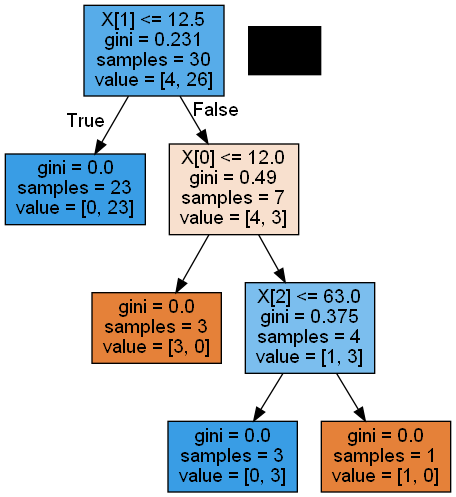

In [6]:
from six import StringIO
from sklearn.tree import export_graphviz

from pydotplus import graph_from_dot_data
from IPython.display import Image

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

Algorítimo de florestas randômicas que utiliza o conceito de árvores de decisões. Cria várias árvores (a floresta) com um conjunto de dados e realiza a predição com base na maioria de respostas dadas pelas árvores. Aumenta a precisão das árvores por permitir escolher a árvore mais assertiva.

Tem a desvantagem de ser muito complexa e requerer maior poder computacional além de mais treinamento.

### Exemplo: Detecção de notas falsas

O exemplo à seguir realiza a validação de notas verdadeiras/falsas usando os dados dos [UCI](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).
Cada linha indica os dados de uma nota e as colunas do CSV são:
- variance: oscilação na imagem transformada (Wavelet)
- skewness: assimetria da imagem
- curtosis: achatamento
- entropy: entropia
- class (target): 0 para uma nota genuína, 1 para nota falsa

Primeiro separamos os dados de teste e treino (```x```), assim como os resultados previstos para teste/treino (```y```).
Também é realizada a normalização dos dados com o ```StandarScaler``` para evitar furos no treino.

In [22]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

csv = read_csv("./data_banknote_authentication.csv")
x = csv.iloc[:, 0:4].values
y = csv.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Criamos a floresta e treinamos com os dados de treino e realizamos predição com os dados de teste

In [23]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

Após isso, geramos a matriz de confusão com os dados de teste e preditos, assim como as estatísticas de classificação e precisão do modelo.

In [25]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Falso negativo:", fn)
print("Falso positivo:", fp)
print("Verdadeiro negativo:", tn)
print("Verdadeiro negativo:", tp)


Falso negativo: 1
Falso positivo: 2
Verdadeiro negativo: 155
Verdadeiro negativo: 117


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [20]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9890909090909091
